# **Import Library**

In [18]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.6 MB/s eta 0:00:00


In [19]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort

Perintah di atas akan mengunduh dan menginstal pustaka google_play_scraper serta dependensinya jika diperlukan. Setelah instalasi selesai, Anda dapat mengimpor dan menggunakannya dalam notebook Anda untuk mengambil data dari Play Store dan melanjutkan dengan analisis sentimen.

In [17]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data

# Scapping Dataset

Pada proyek ini, kita akan melakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait aplikasi "Google Gemini" di Play Store. Analisis sentimen akan membantu kita untuk memahami bagaimana pengguna merasakan dan mengungkapkan pandangan mereka terhadap aplikasi ini.

Dengan menggunakan berbagai teknik pemrosesan teks dan algoritma machine learning, kita akan mencoba mengidentifikasi apakah ulasan pengguna terhadap aplikasi "Google Gemini" cenderung positif, negatif, atau netral. Hasil analisis sentimen ini dapat memberikan wawasan berharga kepada pengembang aplikasi untuk meningkatkan pengalaman pengguna. Mari kita mulai menjelajahi ulasan pengguna dan menganalisis sentimen di sekitar aplikasi "Google Gemini" dengan lebih mendalam.

In [ ]:
# Scraping
from google_play_scraper import reviews, Sort
import time

# Konfigurasi target
APP_ID = 'com.google.android.apps.bard'

print("Memulai scraping....")

# Mengambil data
result, continuation_token = reviews(
    APP_ID,
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=50000,
)
data_ulasan = result
print(f"Berhasil mengambil {len(data_ulasan)} data.")

Memulai scraping....
Berhasil mengambil 40500 data.


# Save Scrappig to csv

In [ ]:
print(data_ulasan[0].keys())

dict_keys(['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'])


In [ ]:
# Simpan mentah ke csv
import csv

# Menggunakan data_ulasan
with open('raw_ulasan_aplikasi_gemini.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['content', 'score'])

    for review in data_ulasan:
        writer.writerow([review['content'], review['score']])

print("File CSV berhasil dibuat!")

File CSV berhasil dibuat!


## Cek data kosong

In [20]:
import pandas as pd

print(f"Dataframe berhasil dibuat dengan {len(df)} baris.")
print("-" * 40)

# 2. Cek apakah ada data NULL (kosong secara sistem)
null_counts = df.isnull().sum()
print("Jumlah Data NULL per Kolom:")
print(null_counts)

print("-" * 40)

# 3. Cek ulasan yang isinya cuma spasi atau string kosong (kosong secara visual)
# Kita pakai .astype(str) dulu biar aman kalau ada data non-string
empty_string = df[df['content'].astype(str).str.strip() == ''].shape[0]
print(f"Ulasan berisi teks kosong/spasi: {empty_string}")

# 4. Tampilkan baris yang NULL buat kita intip
if null_counts.any():
    print("\nCONTOH DATA NULL:")
    # Menggunakan df.any(axis=1) untuk mencari baris yang punya minimal 1 kolom NULL
    display(df[df.isnull().any(axis=1)].head())
else:
    print("\nAman! Tidak ada data NULL yang terdeteksi.")

Dataframe berhasil dibuat dengan 40500 baris.
----------------------------------------
Jumlah Data NULL per Kolom:
content       0
score         0
category      0
word_count    0
dtype: int64
----------------------------------------
Ulasan berisi teks kosong/spasi: 0

Aman! Tidak ada data NULL yang terdeteksi.


## PREVIEW DATASET

In [21]:
# Render tabel dengan konten rata kiri
styled_df = df.iloc[:5, :2].style.set_properties(**{
    'text-align': 'left',
    'white-space': 'normal'  # Biar teks panjang gak kepotong ke samping
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]} # Header juga rata kiri
])

display(styled_df)

print("\n" + "="*50)

,content,score
0,"bagus sih, tp akhir"" ini kenapa analisis nya suka ribet ya.... perasaan dulu langsung sat set jadi foto, sekarang harus ada penjelasannya dulu, ditambah kadang ga ada hasil foto nya. kemarin sih bilang nya eror, tp pas udh jadi malah makin ribettt, penjelasannya suka panjang lebar dan ga ada hasil nya. Jd harus ngulang"" terus😐",4
1,"nurut aku sih udah bagus gak ada batasan limit mengirim ketikan pesan. Kekurangannya cuman satu sih, kalau bisa setiap ketikan pesan harusnya bisa hapus atau edit. Baik bekas historynya ataupun baru pesan dikirim. Kalau bagian pesna dikirim saja yang bisa diedit tapi yang history lognya gak, ya sama aja bohong. Kurang bagus kalau gak diperbaiki. ini saran paling bagus dari aku sih.",5
2,"Berapa batas penggunaan token setiap hari untuk versi AI Pro atau AI Plus, batasnya cepat sekali habis. Sering kali salah memberikan perbaikan skrip, koreksi berulang, salah sintaks, belum selesai, batasan sudah habis harus menunggu untuk reset. Setiap perbaikan skrip kerap menimbulkan efek error domino yang tidak berkesudahan. Tidak ada kontrol indikator kuota token terpakai, tidak transparan. Pengguna butuh transparasi penggunaan token, token listrik saja ada indikator meter. Mengecewakan ..",1
3,terlalu banyak batasan yang tidak masuk logika untuk membuat foto tolong diperbaiki batasan nya sering kali foto yang dibuat tidak muncul dan selalu salah dalam menghasilkan foto tidak sesuai dengan apa yang di tuliskan masa iya sekelas Google AI nya CACAD!! MEMALUKAN MAKIN HARI MAKIN TURUN KWALITAS NYA!,1
4,"Apk bagus skli, dan sangat menyenangkan bisa merubah apa saja yg kita inginkan. Tpi knp awal² hasilnya bgs dan jernih, setelah beberapa kali digunakan hasil potonya jelek buram/blur. tlg diperbaiki agar hasil editannya kembali bgs & jernih mksh.",5


#Data labeling berdasarkan score

In [24]:
import pandas as pd

# 1. Samakan nama kolom (antisipasi typo huruf besar/kecil)
df.columns = ['content', 'score']

# 2. Buat fungsi untuk Labeling 3 Kelas
def pelabelan(skor):
  if skor <= 2:
    return 'Negatif'
  elif skor <= 4:
    return 'Netral'
  else:
    return 'Positif'

# 3. Terapkan fungsi
df['category'] = df['score'].apply(pelabelan)

# 4. Cek Distribusi Baru
print("Jumlah Data per Kategori:")
print(df['category'].value_counts())

# 5. Simpan hasil yang sudah berlabel ke CSV baru
df.to_csv('ulasan_with_score.csv', index=False)
print("\nsiap digunakan!")

Jumlah Data per Kategori:
category
Positif    26046
Negatif     8782
Netral      5672
Name: count, dtype: int64

siap digunakan!


In [25]:
print(df.columns.tolist())

['content', 'score', 'category']


## Cek sebaran sentimen berdasarkan score

/tmp/ipython-input-437988174.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='category', data=df, palette=colors, order=['Positif', 'Netral', 'Negatif'])


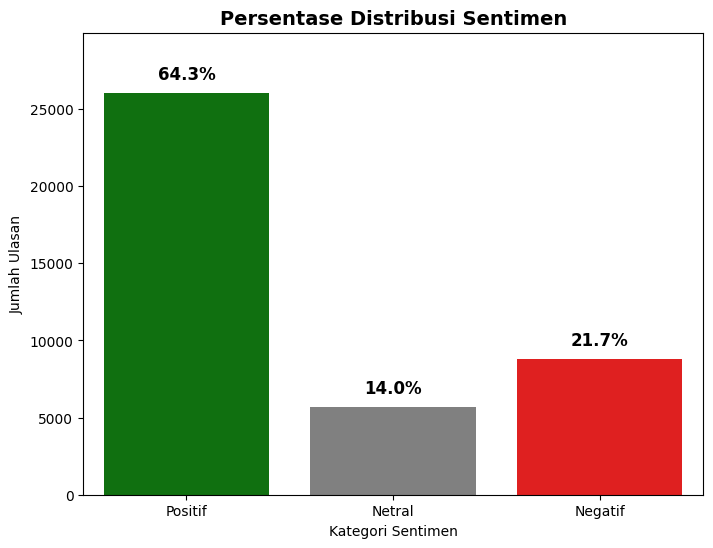

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Tentukan warna sesuai urutan: Positif (Green), Netral (Grey), Negatif (Red)
colors = ['green', 'gray', 'red']

# Buat countplot dengan urutan dan warna yang spesifik
ax = sns.countplot(x='category', data=df, palette=colors, order=['Positif', 'Netral', 'Negatif'])

# Menambahkan angka persentase di atas batang
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(percentage, (x, y),
                ha='center', va='bottom',
                size=12, fontweight='bold',
                xytext=(0, 7), # Jarak teks dari ujung batang
                textcoords='offset points')

# Menambah space vertikal (15% dari nilai tertinggi)
max_count = df['category'].value_counts().max()
plt.ylim(0, max_count * 1.15)

plt.title('Persentase Distribusi Sentimen', fontsize=14, fontweight='bold')
plt.ylabel('Jumlah Ulasan')
plt.xlabel('Kategori Sentimen')
plt.show()

## Cek sebaran panajang komentar

In [27]:
df['word_count'] = df['content'].astype(str).apply(lambda x: len(x.split()))

In [28]:
print(df.columns.tolist())

['content', 'score', 'category', 'word_count']


In [29]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# 2. Hitung rata-rata per kategori
avg_per_sentiment = df.groupby('category')['word_count'].mean().round(2)

# 3. Tampilkan hasilnya
print("Rata-rata panjang kata tiap sentimen:")
print(avg_per_sentiment)

Rata-rata panjang kata tiap sentimen:
category
Negatif    10.57
Netral      9.42
Positif     6.70
Name: word_count, dtype: float64


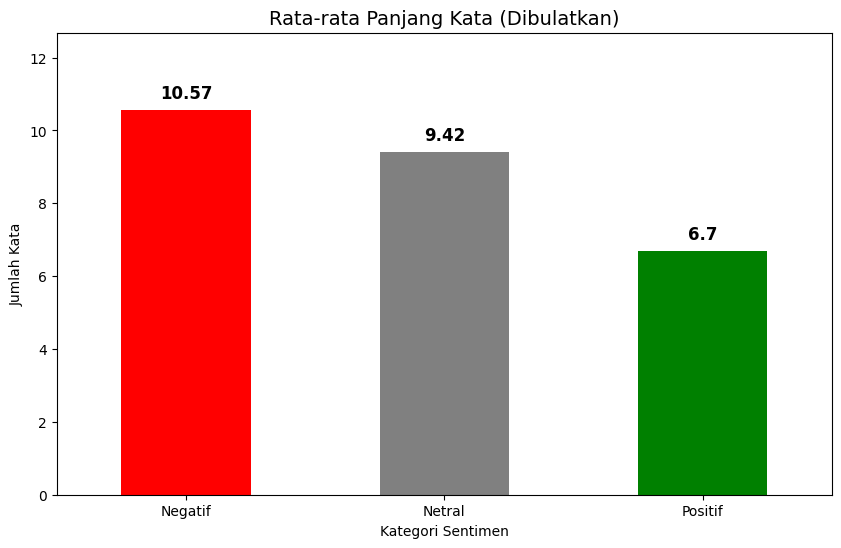

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Warna disesuaikan: Negatif(Red), Netral(Gray), Positif(Green)
ax = avg_per_sentiment.plot(kind='bar', color=['red', 'gray', 'green'])

# Tambahkan label angka di atas batang
for i, v in enumerate(avg_per_sentiment):
    plt.text(i, v + 0.3, str(v), ha='center', fontweight='bold', fontsize=12)

# --- TAMBAHKAN RUANG VERTIKAL DISINI ---
plt.ylim(0, avg_per_sentiment.max() * 1.2)

plt.title('Rata-rata Panjang Kata (Dibulatkan)', fontsize=14)
plt.ylabel('Jumlah Kata')
plt.xlabel('Kategori Sentimen')
plt.xticks(rotation=0)
plt.show()

## Preview dataset

In [31]:
df_tampil = df[['content', 'score', 'category', 'word_count']].head(5)

# Render tabel dengan gaya rata kiri
styled_full = df_tampil.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'normal'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'left')]}
])

display(styled_full)

print("\n" + "="*75)
print(f"Total Kolom: {len(df.columns)} {list(df.columns)}")

,content,score,category,word_count
0,"bagus sih, tp akhir"" ini kenapa analisis nya suka ribet ya.... perasaan dulu langsung sat set jadi foto, sekarang harus ada penjelasannya dulu, ditambah kadang ga ada hasil foto nya. kemarin sih bilang nya eror, tp pas udh jadi malah makin ribettt, penjelasannya suka panjang lebar dan ga ada hasil nya. Jd harus ngulang"" terus😐",4,Netral,55
1,"nurut aku sih udah bagus gak ada batasan limit mengirim ketikan pesan. Kekurangannya cuman satu sih, kalau bisa setiap ketikan pesan harusnya bisa hapus atau edit. Baik bekas historynya ataupun baru pesan dikirim. Kalau bagian pesna dikirim saja yang bisa diedit tapi yang history lognya gak, ya sama aja bohong. Kurang bagus kalau gak diperbaiki. ini saran paling bagus dari aku sih.",5,Positif,62
2,"Berapa batas penggunaan token setiap hari untuk versi AI Pro atau AI Plus, batasnya cepat sekali habis. Sering kali salah memberikan perbaikan skrip, koreksi berulang, salah sintaks, belum selesai, batasan sudah habis harus menunggu untuk reset. Setiap perbaikan skrip kerap menimbulkan efek error domino yang tidak berkesudahan. Tidak ada kontrol indikator kuota token terpakai, tidak transparan. Pengguna butuh transparasi penggunaan token, token listrik saja ada indikator meter. Mengecewakan ..",1,Negatif,69
3,terlalu banyak batasan yang tidak masuk logika untuk membuat foto tolong diperbaiki batasan nya sering kali foto yang dibuat tidak muncul dan selalu salah dalam menghasilkan foto tidak sesuai dengan apa yang di tuliskan masa iya sekelas Google AI nya CACAD!! MEMALUKAN MAKIN HARI MAKIN TURUN KWALITAS NYA!,1,Negatif,48
4,"Apk bagus skli, dan sangat menyenangkan bisa merubah apa saja yg kita inginkan. Tpi knp awal² hasilnya bgs dan jernih, setelah beberapa kali digunakan hasil potonya jelek buram/blur. tlg diperbaiki agar hasil editannya kembali bgs & jernih mksh.",5,Positif,38



Total Kolom: 4 ['content', 'score', 'category', 'word_count']


In [32]:
# Simpan Dataset
save_path_labeled = 'ulasan_with_score.csv'

# Simpan DataFrame ke CSV
df.to_csv(save_path_labeled, index=False)

print(f"✅ File berlabel berhasil disimpan: {save_path_labeled}")

✅ File berlabel berhasil disimpan: ulasan_with_score.csv
